# Jax Level 0 Data Owner Experience - Chapter 1
## Part 0 - Initial Setup

Link to the original Jax tutorial: https://jax.readthedocs.io/en/latest/jax-101/01-jax-basics.html

In [1]:
# Import the necessary libraries
import syft as sy
sy.requires(">=0.8-beta")
import jax
import jax.numpy as jnp
import numpy as np

/home/teo/anaconda3/envs/PySyft/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/teo/OpenMined/PySyft


✅ The installed version of syft==0.8.0b7 matches the requirement >=0.8b0


In [2]:
# Launch the domain
node = sy.orchestra.launch(name="test-domain-1", reset=True)
domain_client = node.login(email="info@openmined.org", password="changethis")

SQLite Store Path:
!open file:///tmp/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.ProjectService'>, <class 'syft.core.node.new.data_subject_member_service.DataSubjectMemberService'>]


In [3]:
# Add a dummy data subject
dummy_data_subject = sy.DataSubject(name="Dummy", aliases=["dummy"])
dummy_member = sy.DataSubject(name="Dummy Member", aliases=["dummy:member"])
dummy_data_subject.add_member(dummy_member)
registry = domain_client.data_subject_registry
response = registry.add_data_subject(dummy_data_subject)
response

<class 'syft.core.node.new.response.SyftSuccess'>: 2 Data Subjects Registered

In [4]:
# Check the data subjects
data_subjects = domain_client.api.services.data_subject.get_all()
data_subjects

,type,id
0,<DataSubject: Dummy>,0984a372c6a449eab5018e8852546470
1,<DataSubject: Dummy Member>,93f1f951b1de4ae8a7fa5271f313ea34


In [5]:
# Add the needed data for the tutorial
# Optional add description, citation, url, contributors
dataset = sy.Dataset(name="JAX - Chapter 1 data")
dataset.set_description("Dummy dataset for Chapter 1")
sos_asset = sy.Asset(name='sum-of-squares-data')
sos_asset.set_description("dummy array for the first set of functions")
sos_asset.set_obj(np.array([1.0, 2.0, 3.0, 4.0]))
sos_asset.set_mock(np.array([1.0, 1.0, 1.0, 1.0]), mock_is_real=False)
sos_asset.add_data_subject(dummy_data_subject)
sos_asset.set_shape((4,))
dataset.add_asset(sos_asset)


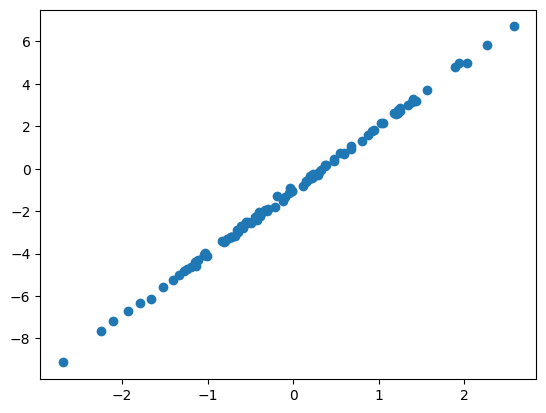

In [6]:
# Generate Training data 
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys)

In [7]:
# Add that data to the dataset
x_asset = sy.Asset(name='xs')
x_asset.set_description("xs")
x_asset.set_obj(xs)
x_asset.set_mock(xs, mock_is_real=True)
x_asset.add_data_subject(dummy_data_subject)
x_asset.set_shape((100,))
dataset.add_asset(x_asset)

y_asset = sy.Asset(name='ys')
y_asset.set_description("ys")
y_asset.set_obj(ys)
y_asset.set_mock(ys, mock_is_real=True)
y_asset.add_data_subject(dummy_data_subject)
y_asset.set_shape((100,))
dataset.add_asset(y_asset)

In [8]:
# Upload the dataset
domain_client.upload_dataset(dataset)

  0%|          | 0/3 [00:00<?, ?it/s]

Uploading: sum-of-squares-data
Uploading: xs


 67%|██████▋   | 2/3 [00:00<00:00, 14.77it/s]

Uploading: ys


100%|██████████| 3/3 [00:00<00:00, 14.95it/s]


<class 'syft.core.node.new.response.SyftSuccess'>: Dataset Added

### Go to the Data Scientist Notebook for Part 1!

## Part 2 - Review and Approving requests

In [1]:
# Get messages from domain
messages = domain_client.api.services.messages.get_all()
messages

NameError: name 'domain_client' is not defined

In [ ]:
# Fetch the dataset
results = domain_client.api.services.dataset.get_all()
dataset = results[0]
mock = dataset.assets[0].data.syft_action_data
xs = dataset.assets[1].data.syft_action_data
ys = dataset.assets[2].data.syft_action_data

In [9]:
# Review Request
request = messages[0].link
func = request.changes[0].link
func_name = func.service_func_name
print(func_name)
func.raw_code


NameError: name 'messages' is not defined

In [ ]:
# Run the submitted function
user_func = func.unsafe_function
kwargs = [func_name]
real_result = user_func(xs=xs, ys=ys)
real_result

In [ ]:
# Approve the request with the previous result
request.approve()
result = request.accept_by_depositing_result(real_result)
result

### Go to the Data Scientist Notebook!!!